In [1]:
# import required libraries

from sklearn.model_selection import LeaveOneOut, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
# read in the csv to pandas
# print the last 5 rows. Why last 5 rows? Because I am bored with using head()

df = pd.read_csv("../Auto.csv")

df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [3]:
# check the information of the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
# my horsepower is always an object for some reason
# force it to be a float

df["horsepower"] = df["horsepower"].apply(pd.to_numeric, errors="coerce")

In [5]:
# recheck the data for any more surprises

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [6]:
# noticed there are 5 null rows in horsepower so drop them

df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [7]:
# assign predictor and response variables

X = df[["horsepower"]]
y = df["mpg"]

In [8]:
# define the cross validation method

cv = LeaveOneOut()

In [9]:
# build the model

lr = LinearRegression()

In [10]:
# fit the model and print out the intercept and coefficient

lr.fit(X, y)

lr.intercept_, lr.coef_

(39.93586102117047, array([-0.15784473]))

In [11]:
# cross validate and get the absolute er
scores = cross_val_score(lr, X, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

np.mean(np.absolute(scores))

24.231513517929226

In [12]:
# fit transform the X train and test for polynomial regressions (from 1 to 10)

errors = []

for i in range(1, 11):
    poly_2 = PolynomialFeatures(degree=i)
    X_2 = poly_2.fit_transform(X)

    lr_poly_2 = LinearRegression()
    lr_poly_2.fit(X_2, y)

    # cross validate and get the absolute er
    scores = cross_val_score(lr, X_2, y, scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)

    error = np.mean(np.absolute(scores))
    errors.append(error)

errors    

[24.231513517929226,
 19.248213124489446,
 19.334984064120338,
 19.424430311931044,
 19.033209197923828,
 18.985753931377232,
 19.125823594370413,
 19.224212866382267,
 19.13360615915202,
 18.94404596754454]

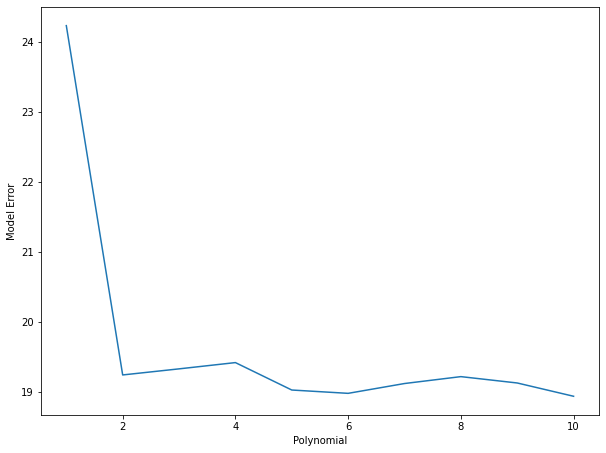

In [13]:
plt.figure(figsize=(10, 7.5))

plt.plot([i for i in range(1, 11)], errors)
plt.xlabel("Polynomial")
plt.ylabel("Model Error")
plt.show()